In [1]:
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import config 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Client
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter()
        self.twitter_client = API(self.auth)
        self.twitter_user  =twitter_user
    
    def get_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets
    
    def get_frds(self, num_frds):
        frds = []
        for tweet in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_frds):
            frds.append(tweet)
        return frds



# Authenticator
class TwitterAuthenticator():
    def authenticate_twitter(self):
        auth = OAuthHandler(config.API_KEY, config.API_SECRET_KEY)
        auth.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)
        return auth     


# Streamer
class TwitterStreamer():
    """
    class for streaming and processing live tweets
    """
    def __init__(self):
        self.twitter_auth = TwitterAuthenticator()
        
    def stream_tweets(self, hashtags_list):
        # Handles twitter authentication and connection to twitter streamer API
        listener = TwitterListener()
        auth = self.twitter_auth.authenticate_twitter()
        stream = Stream(auth, listener)
        stream.filter(track=hashtags_list, is_async=True)
        

# Streamer Listener
class TwitterListener(StreamListener):
    """
    Basic listener class that prints to cmd
    """
    def on_data(self, data):
        print(data)
        return True
    
    def on_error(self, status):
        # Return False in case rate limit occurs
        if status==402:
            return False
        print(status)

In [3]:
class TweetAnalysizer():
    
    def tweets2df(self, tweets):
        df = pd.DataFrame(data = [tweet.text for tweet in tweets], columns=["Tweets"])
        df["id"] = np.array([tweet.id for tweet in tweets])
        df["geo"] = np.array([tweet.geo for tweet in tweets])
        df["date"] = np.array([tweet.created_at for tweet in tweets])
        df["likes"] = np.array([tweet.favorite_count for tweet in tweets])
        
        return df

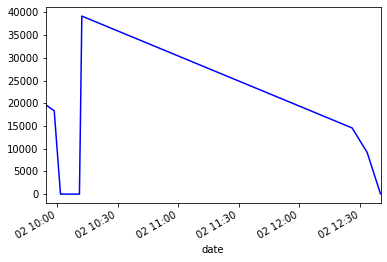

In [4]:
# hashtags_list = ["nvidia"]
# twitter_streamer = TwitterStreamer()
# tweets = twitter_streamer.stream_tweets(hashtags_list)

twitter_client = TwitterClient("realdonaldtrump")
tweets = twitter_client.get_tweets(10)

df = TweetAnalysizer().tweets2df(tweets)
df
# Time Series
time_likes = pd.Series(data=df["likes"].values, index=df["date"])
time_likes.plot(color="b")
plt.show()

In [9]:
query="#nvidia"

auth = TwitterAuthenticator().authenticate_twitter()
twitter_api = API(auth)

for tweet in Cursor(twitter_api.search, q=query, lang="ENG").items(10):
    print(tweet.text)

In [24]:
tweets = twitter_api.search(q=query, lang="en",count=150)
for i,tweet in enumerate(tweets):
    print(i,tweet.text)
    print()

0 RT @msigaming: GAMING D.N.A continues!
#MSI #GeForce RTX™ 30 GAMING TRIO Series graphics card is the best teammate, bringing you all the be…

1 RT @YunaGamesEN: GIVEAWAY 🎁 

Join the #YunaGames Launch Party and win! 🥳 

Always wanted the #Nvidia 2080 Ti graphics card? Today is your…

2 @geoffkeighley I.... I want #Nvidia ‘s new, hoverboard.

3 @BestBuy Hey Best Buy!  Is there a way to set up an alert for when the new Nvidia cards are available for pre-order… https://t.co/NeBw2eQ2le

4 RT @msigaming: GAMING D.N.A continues!
#MSI #GeForce RTX™ 30 GAMING TRIO Series graphics card is the best teammate, bringing you all the be…

5 Ps5 is like the water-boy of gaming.   Stand on the sidelines and watch the big boys play.   

#ps5 #XboxSeriesX… https://t.co/FkrpDxSQL5

6 RT @CrouchJumplnc: Who's upgrading? 🤔
#graphicscard #Nvidia #pcgaming #pcbuilds

7 RT @RedGamingTech: Analyzing #Nvidia's #RTX 30 Announcement - These Cards Are CRAZY #RTX30 #Ampere #RTX3080 #RTX3090 #RTX3070 

https://t.c…

In [25]:
tweets = twitter_api.search(q=query, lang="en",count=150)
for i,tweet in enumerate(tweets):
    print(i,tweet.text)
    print()

0 RT @YunaGamesEN: GIVEAWAY 🎁 

Join the #YunaGames Launch Party and win! 🥳 

Always wanted the #Nvidia 2080 Ti graphics card? Today is your…

1 RT @msigaming: GAMING D.N.A continues!
#MSI #GeForce RTX™ 30 GAMING TRIO Series graphics card is the best teammate, bringing you all the be…

2 RT @YunaGamesEN: GIVEAWAY 🎁 

Join the #YunaGames Launch Party and win! 🥳 

Always wanted the #Nvidia 2080 Ti graphics card? Today is your…

3 @geoffkeighley I.... I want #Nvidia ‘s new, hoverboard.

4 @BestBuy Hey Best Buy!  Is there a way to set up an alert for when the new Nvidia cards are available for pre-order… https://t.co/NeBw2eQ2le

5 RT @msigaming: GAMING D.N.A continues!
#MSI #GeForce RTX™ 30 GAMING TRIO Series graphics card is the best teammate, bringing you all the be…

6 Ps5 is like the water-boy of gaming.   Stand on the sidelines and watch the big boys play.   

#ps5 #XboxSeriesX… https://t.co/FkrpDxSQL5

7 RT @CrouchJumplnc: Who's upgrading? 🤔
#graphicscard #Nvidia #pcgaming #pcbuilds
